In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda GeForce RTX 2070


# Generate data

In [3]:
import random
lstX = []
lstY = []
for x in range(-5000, 5000, 250):
  lstX.append([x])
  y = 3*x*x*x + 2*x*x + 5*x + 4
  lstY.append([y])

In [4]:
# lstX

In [5]:
# lstY

In [6]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


In [7]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(32, 1) (8, 1) (32, 1) (8, 1)


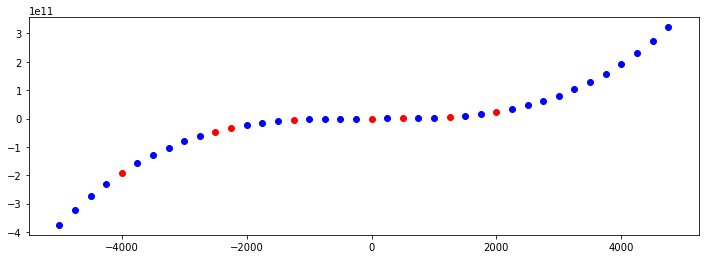

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN

In [9]:
import torch.nn as nn

In [10]:
MyNet = nn.Sequential(
    nn.Linear(1, 50),
    nn.ReLU(),
    nn.Linear(50, 25),
    nn.ReLU(),
    nn.Linear(25, 15),
    nn.ReLU(),
    nn.Linear(15, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=15, bias=True)
  (5): ReLU()
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): ReLU()
  (8): Linear(in_features=10, out_features=1, bias=True)
)


In [11]:
from torchsummary import summary
summary(MyNet, input_size=(32, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 50]             100
              ReLU-2               [-1, 32, 50]               0
            Linear-3               [-1, 32, 25]           1,275
              ReLU-4               [-1, 32, 25]               0
            Linear-5               [-1, 32, 15]             390
              ReLU-6               [-1, 32, 15]               0
            Linear-7               [-1, 32, 10]             160
              ReLU-8               [-1, 32, 10]               0
            Linear-9                [-1, 32, 1]              11
Total params: 1,936
Trainable params: 1,936
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.01
Estimated Total Size (MB): 0.06
-----------------------------------------------

In [12]:
loss_func = nn.MSELoss()

In [13]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Train N epoches

In [14]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [15]:
# tensorX

In [16]:
# tensorY_hat

In [17]:
lossLst = []
for epoch in range(1, 5000):
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY_hat, tensorY)
    loss1 = float(loss)
    #print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [18]:
# lossLst

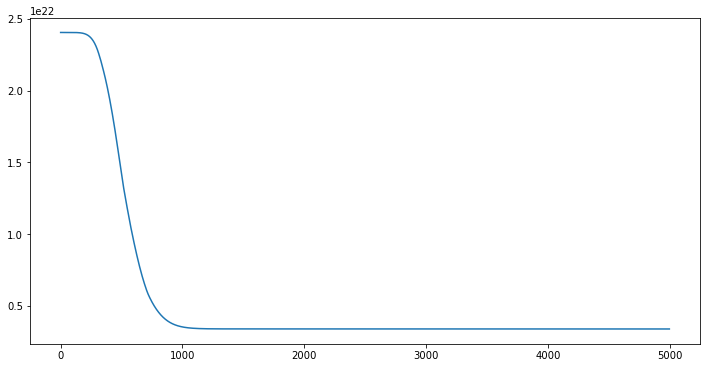

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

# Training data performance

In [20]:
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

3381188884339177291776.00


In [21]:
trainY = tensorY.detach().cpu().numpy()

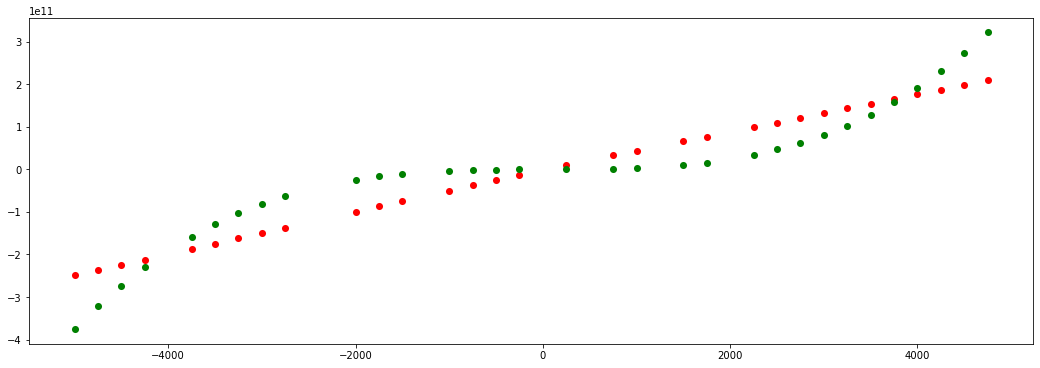

In [22]:
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color="red")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="green")
plt.show()

# Test 

In [23]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY_hat = torch.FloatTensor(testY_hat).to(device)
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

2788942452391866793984.00


In [24]:
testY = tensorY.detach().cpu().numpy()

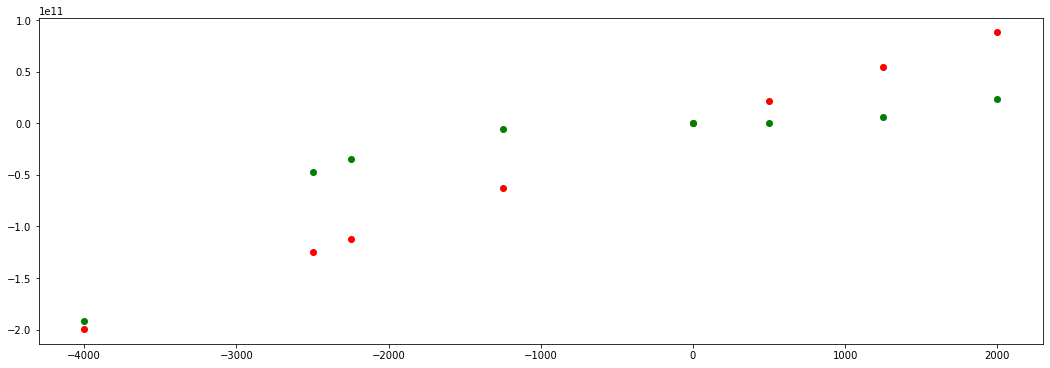

In [25]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY, s=50, lw=0, color="red")
plt.scatter(testX, testY_hat, s=50, lw=0, color="green")
plt.show()